In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import classification_report
import time 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os

directory = '/kaggle/input/majorplantdiseasedetection/dataset/train'
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")


Contents of the directory:
Tomato___Late_blight
Tomato___healthy
Grape___healthy
Potato___healthy
Corn_(maize)___Northern_Leaf_Blight
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Strawberry___Leaf_scorch
Peach___healthy
Coffee__Rust
Apple___Apple_scab
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Coffee__red spider mite
Apple___Black_rot
Cherry_(including_sour)___Powdery_mildew
Peach___Bacterial_spot
Apple___Cedar_apple_rust
Tomato___Target_Spot
Chili__whitefly
Pepper,_bell___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Late_blight
Chili__healthy
Tomato___Tomato_mosaic_virus
Strawberry___healthy
Apple___healthy
Grape___Black_rot
Chili__leaf spot
Potato___Early_blight
Cherry_(including_sour)___healthy
Coffee__healthy
Corn_(maize)___Common_rust_
Grape___Esca_(Black_Measles)
Tomato___Leaf_Mold
Chili__yellowish
Chili__leaf curl
Tomato___Spider_mites Two-spotted_spider_mite
Pepper,_bell___Bacterial_spot


In [3]:
from PIL import Image
import os

# Define the directory path
directory_path = '/kaggle/input/majorplantdiseasedetection/dataset/train'

# List all files in the directory
file_names = os.listdir(directory_path)

# Load images from the directory
images = []
for file_name in file_names:
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        image_path = os.path.join(directory_path, file_name)
        image = Image.open(image_path)
        images.append(image)

# Process the images as required
# ...

# Example: Showing the first image
if images:
    images[0].show()
else:
    print("No images found in the directory.")

No images found in the directory.


In [4]:
# Define parameters
batch_size = 128
num_epochs = 40
image_size = (139, 139)
num_classes = 41


In [5]:
# Load the InceptionV3 model
image_input = Input(shape=(*image_size, 3))
inception_model = InceptionV3(input_tensor=image_input, weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 7s 0us/step


In [6]:
# Add a new classification layer
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
class_outputs = Dense(num_classes, activation='softmax')(x)


In [7]:
# Create the model
model = Model(inputs=inception_model.input, outputs=class_outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Load the training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_dataset = train_datagen.flow_from_directory(
    '/kaggle/input/majorplantdiseasedetection/dataset/train',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the validation data
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_datagen.flow_from_directory(
    '/kaggle/input/majorplantdiseasedetection/dataset/train',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model and store the history
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/kaggle/input/majorplantdiseasedetection/dataset/test',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

# Save the model
model.save('plant_disease_model_inception.h5')


Found 33111 images belonging to 41 classes.
Found 33111 images belonging to 41 classes.
Epoch 1/40
259/259 [==============================] - 1147s 4s/step - loss: 0.6040 - accuracy: 0.8392 - val_loss: 2.6648 - val_accuracy: 0.6634
Epoch 2/40
259/259 [==============================] - 971s 4s/step - loss: 0.2431 - accuracy: 0.9312 - val_loss: 0.9936 - val_accuracy: 0.7928
Epoch 3/40
259/259 [==============================] - 963s 4s/step - loss: 0.1793 - accuracy: 0.9490 - val_loss: 0.5522 - val_accuracy: 0.8757
Epoch 4/40
259/259 [==============================] - 963s 4s/step - loss: 0.1478 - accuracy: 0.9583 - val_loss: 0.4376 - val_accuracy: 0.8855
Epoch 5/40
259/259 [==============================] - 962s 4s/step - loss: 0.1152 - accuracy: 0.9654 - val_loss: 0.2189 - val_accuracy: 0.9404
Epoch 6/40
259/259 [==============================] - 990s 4s/step - loss: 0.1171 - accuracy: 0.9654 - val_loss: 0.2601 - val_accuracy: 0.9292
Epoch 7/40
259/259 [==============================] -

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Save the model in native Keras format
model.save('plant_disease_model_inception.keras')

import joblib

# Save the model using joblib
joblib.dump(model, 'plant_disease_model_inception.pkl')


['plant_disease_model_inception.pkl']

In [15]:
# Save model weights
model.save_weights('model_weights.h5')

# Save model configurations (architecture, optimizer state, etc.)
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    joblib.dump(model_config, config_file)


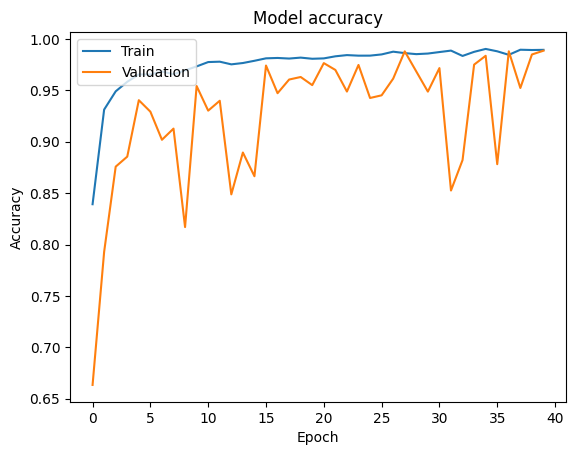

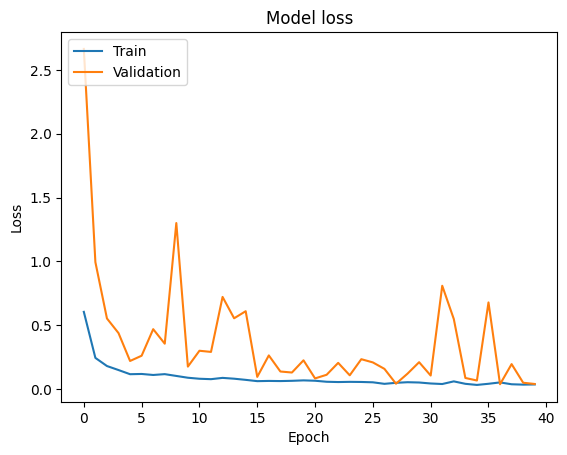

In [8]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

In [9]:
# Load the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/kaggle/input/majorplantdiseasedetection/dataset/test',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order for evaluation
)

# Evaluate the model on the test data
start_time = time.time()
evaluation_result = model.evaluate(test_dataset)
print("Time taken to evaluate the model: " + str(time.time() - start_time))

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

# Make predictions on the test set
y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)

# Get true labels directly from test_dataset
true_labels = test_dataset.labels

# Print the classification report
print(classification_report(true_labels, y_pred_bool, digits=4))

# Optionally, you can save the evaluation results for further analysis
np.savetxt("y_true.txt", true_labels, fmt="%d")
np.savetxt("y_pred.txt", y_pred_bool, fmt="%d")


Found 8339 images belonging to 41 classes.
66/66 [==============================] - 82s 1s/step - loss: 0.1409 - accuracy: 0.9730
Time taken to evaluate the model: 82.84021139144897
Test Loss: 0.140897735953331
Test Accuracy: 0.9730183482170105
66/66 [==============================] - 44s 654ms/step
              precision    recall  f1-score   support

           0     1.0000    0.9524    0.9756       126
           1     1.0000    1.0000    1.0000       124
           2     1.0000    1.0000    1.0000        55
           3     0.9734    1.0000    0.9865       329
           4     1.0000    0.9952    0.9976       210
           5     1.0000    0.9882    0.9941       170
           6     0.3684    0.7000    0.4828        10
           7     0.5000    1.0000    0.6667        10
           8     0.9000    0.9000    0.9000        10
           9     0.8182    0.9000    0.8571        10
          10     1.0000    0.4000    0.5714        10
          11     0.8111    0.6293    0.7087       

In [16]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix
# import joblib
# import numpy as np

# # Extract features from the InceptionV3 model
# train_features = model.predict(train_dataset)
# val_features = model.predict(train_dataset)

# # Flatten the features
# train_features_flatten = train_features.reshape(train_features.shape[0], -1)
# val_features_flatten = val_features.reshape(val_features.shape[0], -1)

# # Scale the data
# scaler = StandardScaler()
# train_features_scaled = scaler.fit_transform(train_features_flatten)
# val_features_scaled = scaler.transform(val_features_flatten)

# # Ensure train_labels is a 1D array
# train_labels = np.argmax(train_labels, axis=1)

# # Train the SVM classifier
# svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
# svm_model.fit(train_features_scaled, train_labels)

# # Save the SVM model
# joblib.dump(svm_model, 'svm_model.pkl')

# # Make predictions on the validation set
# val_predictions = svm_model.predict(val_features_scaled)

# # Convert val_labels to 1D array
# val_labels = np.argmax(val_labels, axis=1)

# # Print the classification report and confusion matrix
# print("Classification Report:")
# print(classification_report(val_labels, val_predictions))
# print("\nConfusion Matrix:")
# print(confusion_matrix(val_labels, val_predictions))
